# Cancer Diagnostics

Creator: 

Dr. WIlliam H. Wolberg (physician) 
University of Wisconsin Hospitals 
Madison, Wisconsin, USA 

Donor: 

Olvi Mangasarian (mangasarian '@' cs.wisc.edu) 
Received by David W. Aha (aha '@' cs.jhu.edu)


Data Set Information:

Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself: 

Group 1: 367 instances (January 1989) 
Group 2: 70 instances (October 1989) 
Group 3: 31 instances (February 1990) 
Group 4: 17 instances (April 1990) 
Group 5: 48 instances (August 1990) 
Group 6: 49 instances (Updated January 1991) 
Group 7: 31 instances (June 1991)
Group 8: 86 instances (November 1991)

Total: 699 points (as of the donated datbase on 15 July 1992) 

## Objecive: Determing if patient's measurements predict breast cancer 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning packages
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Importing our data
data = pd.read_csv('breast-cancer-wisconsin.data', delimiter=',', header =None, encoding ='latin8')
data.columns = ['id_number', 'clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape', 'marginal_adhesion',
             'single_epithetial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

# Drop all null values in the dataset
data = data.dropna()

In [3]:
data.head()

,id_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithetial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
data['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [5]:
# Prints the size of our dataset
data.shape

(699, 11)

In [6]:
# Print the datatypes in our dataframe
data.dtypes

id_number                       int64
clump_thickness                 int64
uniformity_cell_size            int64
uniformity_cell_shape           int64
marginal_adhesion               int64
single_epithetial_cell_size     int64
bare_nuclei                    object
bland_chromatin                 int64
normal_nucleoli                 int64
mitoses                         int64
class                           int64
dtype: object

In [7]:
# Removes non-numeric entries from bare_nuclei
data = data[data.bare_nuclei.apply(lambda x: x.isnumeric())]
data['bare_nuclei'] = data['bare_nuclei'].astype(np.int64)

In [8]:
# Set up the target variable as an array
Y = np.where(data['class'] == 4, 1, 0)

# Remove id and class from the dataframe
X = data.drop('id_number', axis=1)
X = X.drop('class', axis=1)

In [9]:
# View the statistics in the dataframe
data.describe()

,id_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithetial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
# View the statistics in the dataframe
data.describe() 

,id_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithetial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Text(0.5, 1.0, 'Distribution of predictor variables')

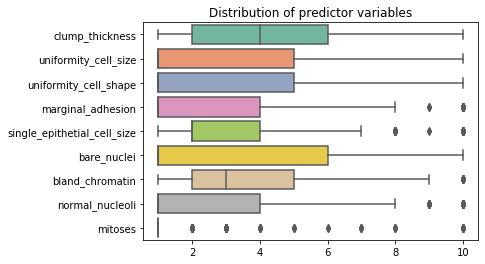

In [11]:
# Create boxplot for all numeric variables
sns.boxplot(data = X, orient ='h', palette = 'Set2')
plt.title('Distribution of predictor variables')

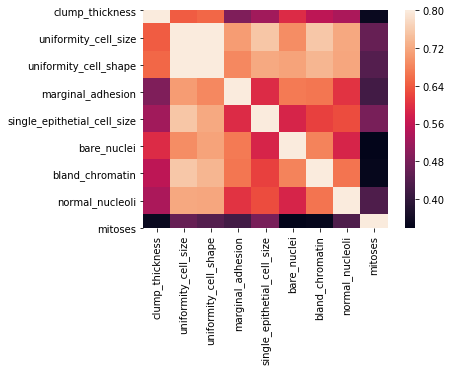

In [12]:
# Creating a correlation matrix
healthmat = X.corr()
sns.heatmap(healthmat, vmax = 0.8, square = True)
plt.show()

In [13]:
# Dropping uniformity_cell_shape since it overlaps too much
# with uniformity_cell_size
X = X.drop('uniformity_cell_shape', axis=1)

(-1.1156682582755633,
 1.1129564944589363,
 -1.1143106757747783,
 1.1172903345825824)

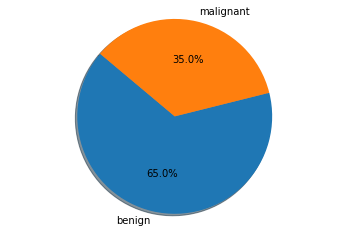

In [14]:
# Creates a pie chart that represents the different categories in our dataset
plt.pie(np.bincount(Y), labels=['benign', 'malignant'],
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2

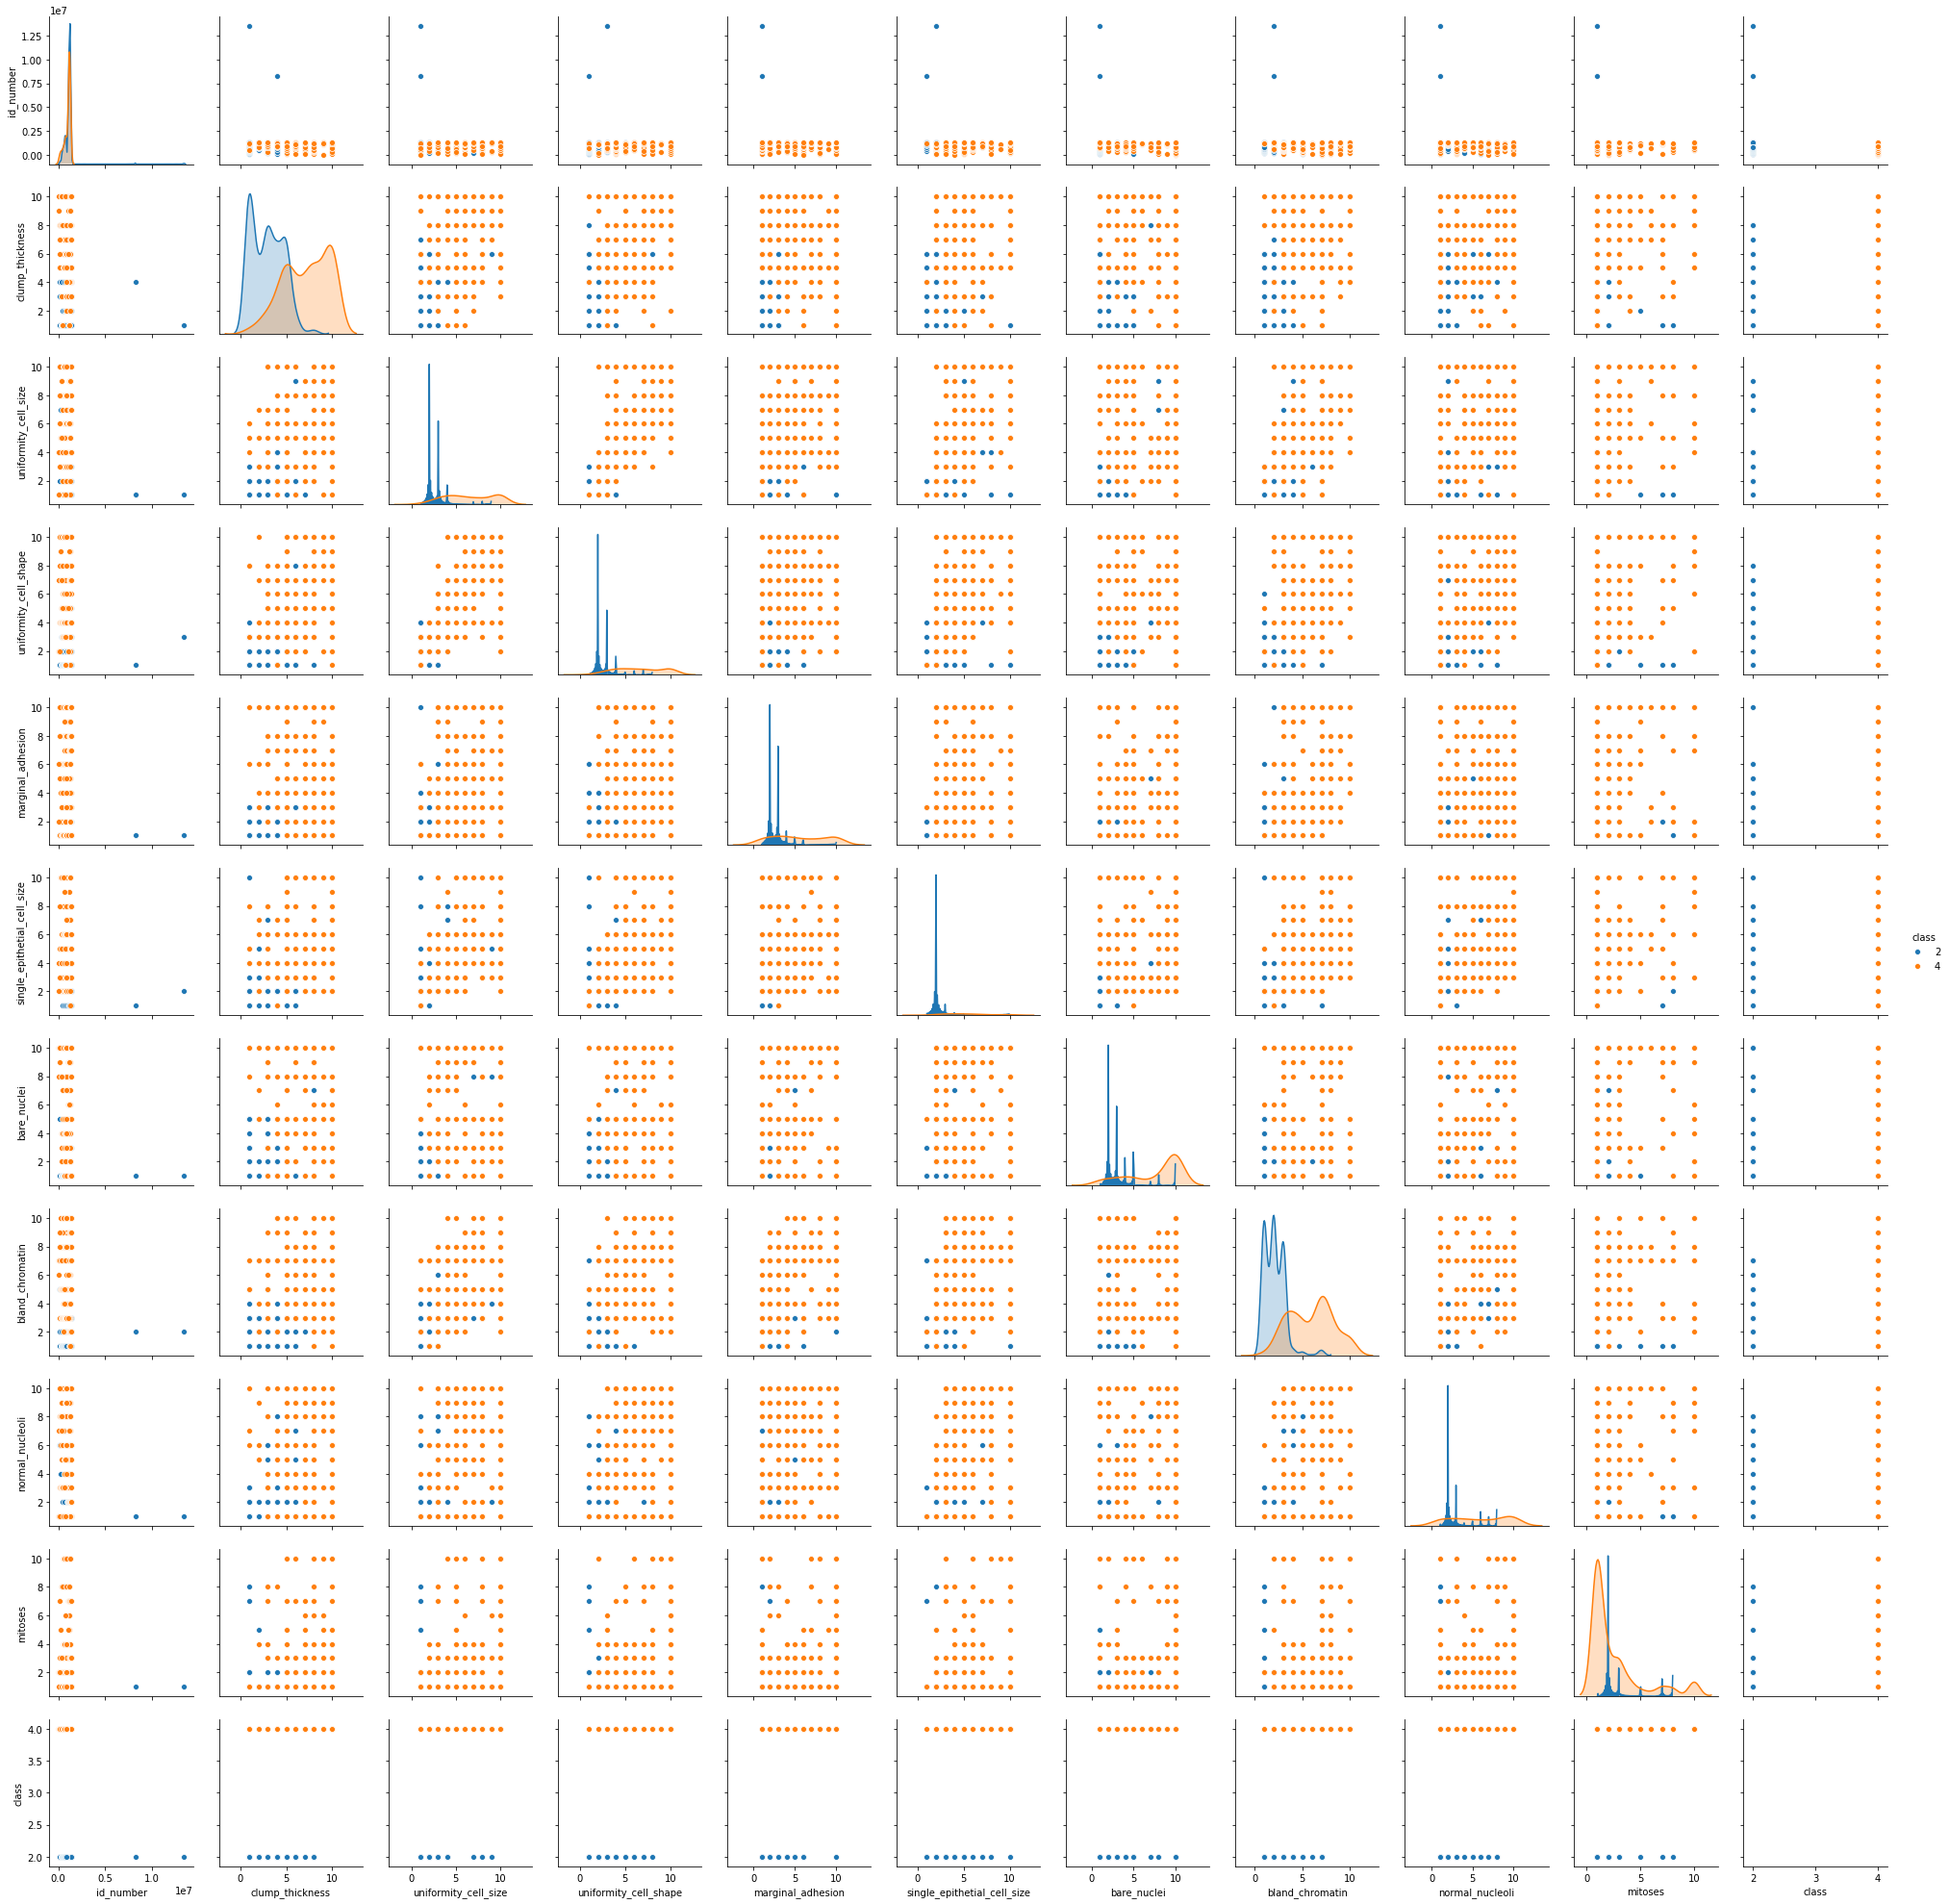

In [15]:
# Plot correlation between predictor variables and
# the target variable
pp = sns.pairplot(data, hue = 'class', size = 2.5)

## Logistic Regression Model

In [16]:
# Split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [17]:
# Constructing our logistic regression model
lr = LogisticRegression(C = 1e9)

# Checking the accuracy of our model using cross validation
cross_val_score(lr, X_train, y_train, cv=5)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

array([0.95652174, 0.94202899, 0.94117647, 0.94117647, 0.98507463])

In [18]:
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

confusion_matrix(y_test, lr_pred)

C:\Users\catan\.conda\envs\catanEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[216,   4],
       [ 12, 110]], dtype=int64)

In [19]:
(201+124)/(201+124+8+9)

0.9502923976608187

### K Nearest Neighbors

In [20]:
# Fitting K-NN to training dataset 6
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [21]:
#Predicting the Test set results 7
y_preds = classifier.predict(X_test)
y_preds

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [22]:
#Evaluating the Model by creating confusion matrix 8
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[215,   5],
       [  6, 116]], dtype=int64)

In [24]:
### Training a Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree =  DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [25]:
predictions = dtree.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       220
           1       0.92      0.90      0.91       122

    accuracy                           0.94       342
   macro avg       0.94      0.93      0.93       342
weighted avg       0.94      0.94      0.94       342

[[211   9]
 [ 12 110]]


In [27]:
(200+118)/(200+118+14+10)

0.9298245614035088

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
rfc_pre = rfc.predict(X_test)

In [30]:
252

252

In [31]:
(201+126)/(201+126+6+9)

0.956140350877193